In [1]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pyarrow.parquet as pq

import datetime

from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
root_dir = 'C:/Users/delst/OneDrive/Desktop/Code/Workspace/Crypto_V2'
sys.path.append(root_dir)

from A_Main.Configurations.setup_env import setup_environment
config = setup_environment(root_dir)

---

# **User Inputs**

In [3]:
selected_crypto = 'ADA'
selected_feature = 'CLOSE'
selected_time_frame = 365*24

---

# **Functions**

In [4]:
def get_crypto_df(
    crypto: str
    ):
    """Retrieve the dataframe for the specified cryptocurrency."""
    
    return dfs.get(crypto)

In [5]:
def get_numeric_stats(df):
    """Returns a dataframe with the following statistics for each numeric column in the dataframe"""
    
    all_stats = []

    for col in df.columns:
        if df[col].dtype != 'object':
            column = df[col]
            
            skewness = skew(column)
            kurt = kurtosis(column)
            mean = np.mean(column)
            std = np.std(column)
            median = np.median(column)

            stats = pd.DataFrame({
                'Col': [col],
                'Skewness': [skewness],
                'Kurtosis': [kurt],
                'Mean' : [mean],
                'std': [std],
                'Median': [median]
            })
            
            all_stats.append(stats)
    
    results = pd.concat(all_stats, ignore_index=True)
    return results

In [6]:
def visualize_selected_feature(
    df: pd.DataFrame,
    column: str,
    n_hours: int
    ):
    """Visualize specified column from training and test data."""
    
    # Split the data into train and test sets
    df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)
    
    # Selecting relevant portions based on n_hours
    train = df_train.iloc[-n_hours // 2:]
    test = df_test.iloc[:n_hours // 2]
    
    # Plotting
    plt.figure(figsize=(20, 6))
    plt.plot(train.index, train[column], label='Train', color='blue')
    plt.plot(test.index, test[column], label='Test', color='red')
    
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} Train and Test Data Visualization')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

---

# **Selected Crypto DataFrame**

In [7]:
cryptos = ['ADA', 'BNB', 'BTC', 'DOGE', 'ETH', 'LTC', 'XRP']
dfs = {}

for crypto in cryptos:
    file_path = os.path.join(config.sdo_parq, f"{crypto}USDT_raw.parquet")

    table = pq.read_table(file_path)
    df = table.to_pandas()
    dfs[crypto] = df

In [8]:
df = get_crypto_df(selected_crypto)
df

,OPEN,HIGH,LOW,CLOSE,VOLUME,QUOTE_ASSET_VOLUME,NUMBER_OF_TRADES,TAKER_BUY_BASE_ASSET_VOLUME,TAKER_BUY_QUOTE_ASSET_VOLUME,SYMBOL,TARGET
OPEN_TIME,,,,,,,,,,,
2018-05-17 04:00:00,0.25369,0.25498,0.25150,0.25241,1602760.38,4.058837e+05,1061,885840.92,2.242411e+05,ADAUSDT,0.366887
2018-05-17 05:00:00,0.25233,0.25495,0.25000,0.25371,1687679.75,4.243838e+05,1061,720236.20,1.813183e+05,ADAUSDT,0.369106
2018-05-17 06:00:00,0.25419,0.25419,0.25265,0.25280,523211.89,1.325188e+05,428,263583.52,6.677832e+04,ADAUSDT,0.414877
2018-05-17 07:00:00,0.25289,0.25385,0.24700,0.24822,1794270.30,4.495385e+05,1285,595354.36,1.490020e+05,ADAUSDT,0.418307
2018-05-17 08:00:00,0.24780,0.24992,0.24604,0.24765,1311302.38,3.248444e+05,1049,590676.08,1.463013e+05,ADAUSDT,0.402284
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 19:00:00,0.36120,0.36120,0.35450,0.35460,8897631.30,3.180578e+06,7965,3688312.30,1.319085e+06,ADAUSDT,0.509147
2023-02-28 20:00:00,0.35470,0.35530,0.35220,0.35390,5202569.80,1.841685e+06,5147,2761708.20,9.780268e+05,ADAUSDT,0.530118
2023-02-28 21:00:00,0.35380,0.35380,0.34850,0.35080,11173088.20,3.915623e+06,12304,4995208.40,1.750992e+06,ADAUSDT,0.519972


---

# **MetaData**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41885 entries, 2018-05-17 04:00:00 to 2023-02-28 23:00:00
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OPEN                          41885 non-null  float64
 1   HIGH                          41885 non-null  float64
 2   LOW                           41885 non-null  float64
 3   CLOSE                         41885 non-null  float64
 4   VOLUME                        41885 non-null  float64
 5   QUOTE_ASSET_VOLUME            41885 non-null  float64
 6   NUMBER_OF_TRADES              41885 non-null  int32  
 7   TAKER_BUY_BASE_ASSET_VOLUME   41885 non-null  float64
 8   TAKER_BUY_QUOTE_ASSET_VOLUME  41885 non-null  float64
 9   SYMBOL                        41885 non-null  object 
 10  TARGET                        41885 non-null  float64
dtypes: float64(9), int32(1), object(1)
memory usage: 3.7+ MB


In [10]:
df.describe()

,OPEN,HIGH,LOW,CLOSE,VOLUME,QUOTE_ASSET_VOLUME,NUMBER_OF_TRADES,TAKER_BUY_BASE_ASSET_VOLUME,TAKER_BUY_QUOTE_ASSET_VOLUME,TARGET
count,41885.000000,41885.000000,41885.000000,41885.000000,4.188500e+04,4.188500e+04,41885.000000,4.188500e+04,4.188500e+04,41885.000000
mean,0.503010,0.507352,0.498384,0.503013,1.111491e+07,6.689527e+06,10161.087907,5.506515e+06,3.317222e+06,0.488059
std,0.641086,0.646773,0.634985,0.641089,1.485536e+07,1.675500e+07,20681.854130,7.453229e+06,8.413322e+06,0.076375
min,0.020120,0.022430,0.017650,0.020090,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.061190,0.061730,0.060720,0.061200,3.675290e+06,3.886399e+05,1137.000000,1.816509e+06,1.947195e+05,0.446148
50%,0.148870,0.150730,0.146960,0.148880,6.526075e+06,1.216674e+06,2997.000000,3.239502e+06,6.015238e+05,0.483786
75%,0.810000,0.816000,0.804300,0.810000,1.260143e+07,5.730471e+06,10203.000000,6.207170e+06,2.817172e+06,0.524119
max,3.095000,3.101000,3.048000,3.095000,4.475996e+08,5.352616e+08,453518.000000,2.492393e+08,2.978622e+08,1.000000


---

In [11]:
get_numeric_stats(df)

,Col,Skewness,Kurtosis,Mean,std,Median
0,OPEN,1.582543,1.754224,5.030097e-01,6.410783e-01,1.488700e-01
1,HIGH,1.581463,1.747314,5.073516e-01,6.467649e-01,1.507300e-01
2,LOW,1.583925,1.763836,4.983842e-01,6.349774e-01,1.469600e-01
3,CLOSE,1.582536,1.754213,5.030131e-01,6.410812e-01,1.488800e-01
4,VOLUME,5.359979,56.153674,1.111491e+07,1.485518e+07,6.526075e+06
5,QUOTE_ASSET_VOLUME,7.479808,97.633423,6.689527e+06,1.675480e+07,1.216674e+06
6,NUMBER_OF_TRADES,5.716787,52.514361,1.016109e+04,2.068161e+04,2.997000e+03
7,TAKER_BUY_BASE_ASSET_VOLUME,5.662962,67.580376,5.506515e+06,7.453140e+06,3.239502e+06
8,TAKER_BUY_QUOTE_ASSET_VOLUME,7.792982,110.436229,3.317222e+06,8.413222e+06,6.015238e+05
9,TARGET,0.528770,2.914357,4.880592e-01,7.637455e-02,4.837856e-01


---

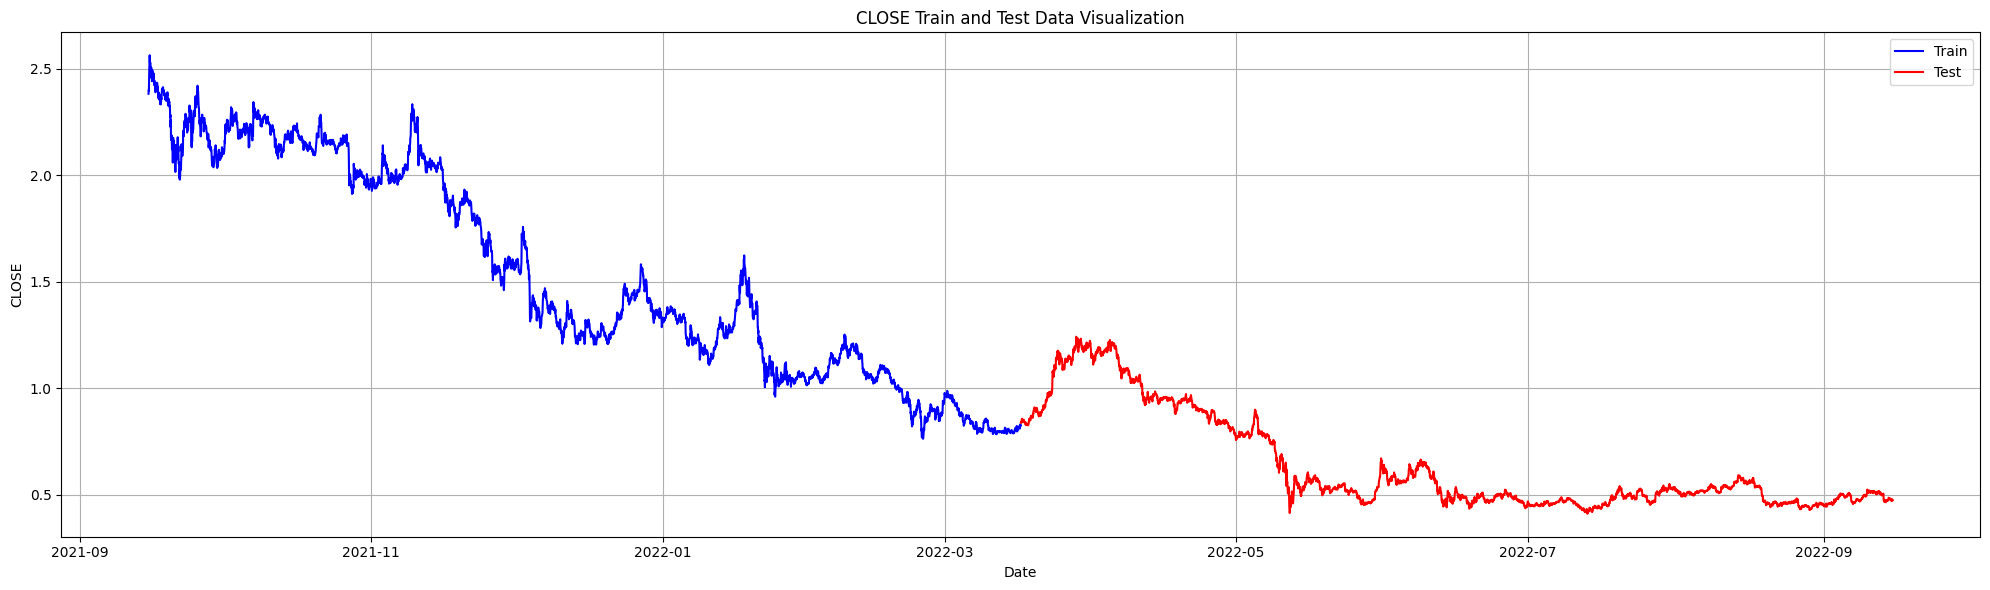

In [12]:
visualize_selected_feature(df, selected_feature, selected_time_frame)

---

# **Further Analysis**

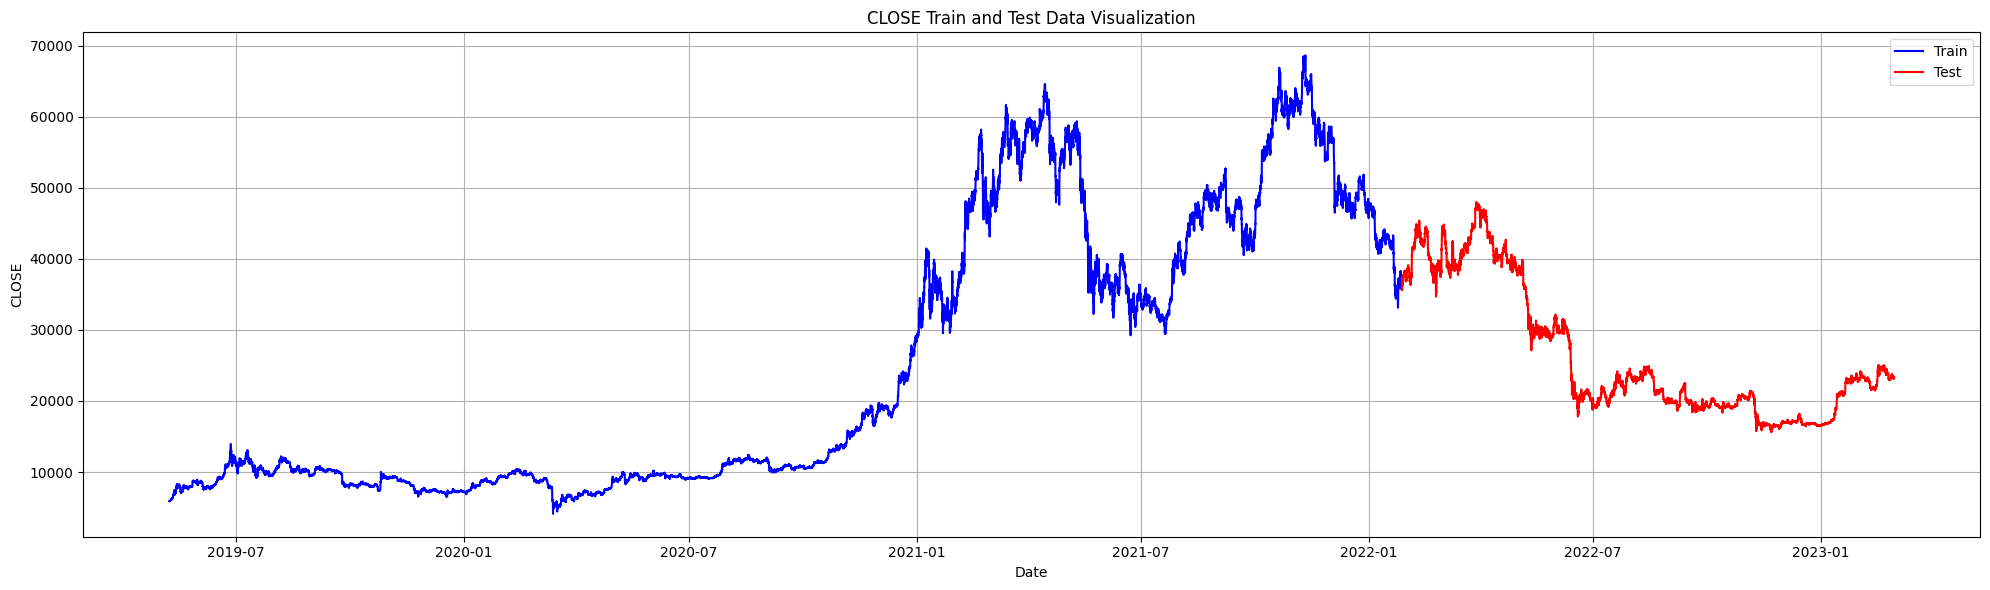

In [13]:
selected_crypto = 'BTC'
df = get_crypto_df(selected_crypto)

selected_feature = 'CLOSE'
selected_time_frame = len(df)

visualize_selected_feature(df, selected_feature, selected_time_frame)

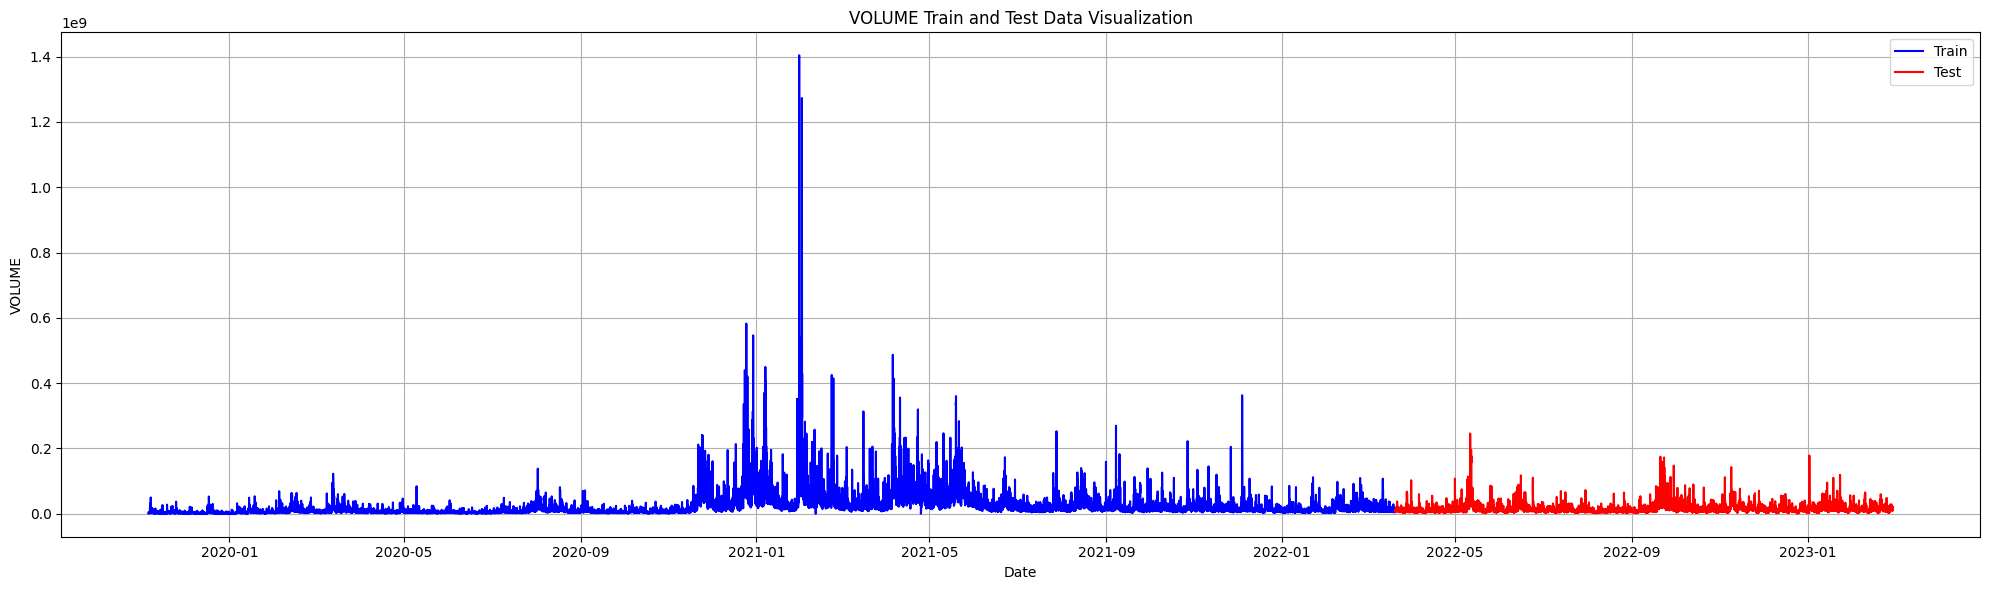

In [14]:
selected_crypto = 'XRP'
df = get_crypto_df(selected_crypto)

selected_feature = 'VOLUME'
selected_time_frame = len(df)

visualize_selected_feature(df, selected_feature, selected_time_frame)

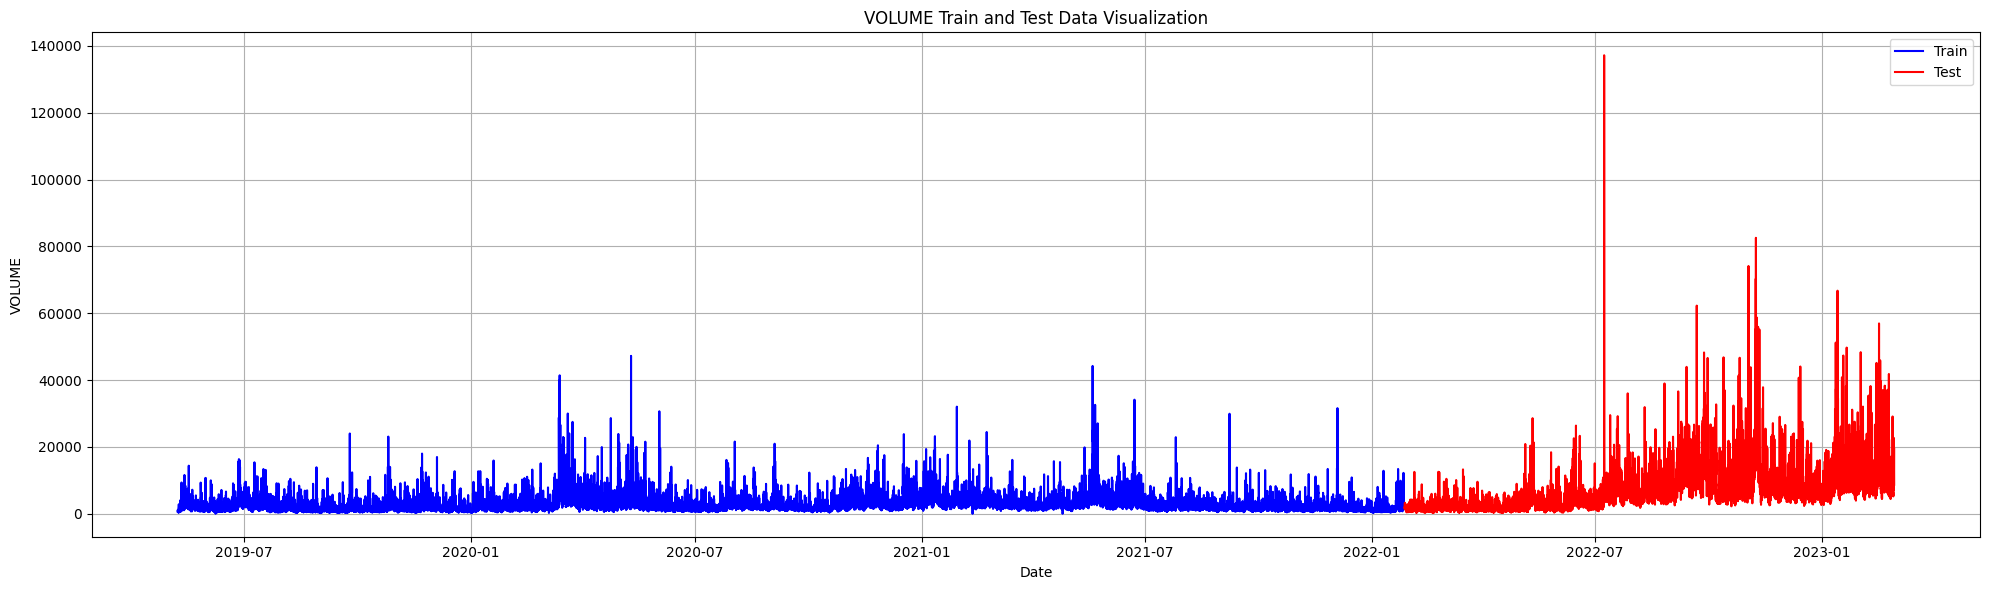

In [15]:
selected_crypto = 'BTC'
df = get_crypto_df(selected_crypto)

selected_feature = 'VOLUME'
selected_time_frame = len(df)

visualize_selected_feature(df, selected_feature, selected_time_frame)